In [1]:
# Dev notebook for transforms, vizualisation of the dataset

import torch

from sklearn.model_selection import train_test_split, StratifiedKFold

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('C:/Users/nilso/Documents/EPFL/MA4/PDS Turberg/Rock_Cuttings_Characterisation/')

from Lamp.AttrDict.AttrDict import *
from Lamp.Model.Dataloader import *


In [2]:
dataframe = pd.read_csv('../Dataset/train_bbox.csv',index_col=0)

In [3]:
dataframe = dataframe.groupby('Label').sample(1000,replace=True,random_state=0).reset_index(drop=True)

In [4]:
X = dataframe.iloc[:,:-1]
y = dataframe.iloc[:,-1]

In [5]:
k = 5
kf = StratifiedKFold(n_splits=k, random_state=None)

In [6]:
for train_index, test_index in kf.split(X,y):
    print(train_index, test_index)
    print(len(train_index), len(test_index))

[ 200  201  202 ... 4997 4998 4999] [   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189 

In [6]:
type_ = 'resized'

if type_ is None:
    transforms = tf.Compose(
        [
            MinMaxNormalization(),
            tf.ToTensor()
        ])
elif type_ is 'raw': 
    transforms = tf.Compose(
        [    
            #tf.Grayscale(num_output_channels=3),
            #tf.ColorJitter(brightness=0.5),
            tf.RandomHorizontalFlip(p=0.5),
            tf.RandomVerticalFlip(p=0.5),
            tf.RandomRotation([-90,90],resample=False, expand=False, center=None, fill=None),
            tf.ToTensor(),
        ])
elif type_ is 'resized':
    transforms = tf.Compose(
        [     
            #tf.Grayscale(num_output_channels=3),  
            #tf.ColorJitter(brightness=0.5),
            tf.RandomHorizontalFlip(p=0.5),
            tf.RandomVerticalFlip(p=0.5),
            tf.RandomRotation([-90,90],resample=False, expand=False, center=None, fill=None),
            tf.Resize((256,256)),
            MinMaxNormalization(),
            tf.ToTensor(),
        ])
elif type_ is 'padded':
    transforms = tf.Compose(
        [     
            #tf.Grayscale(num_output_channels=3),  
            #tf.ColorJitter(brightness=0.5),
            Padding(out_shape=256),            
            tf.RandomHorizontalFlip(p=0.5),
            tf.RandomVerticalFlip(p=0.5),
            tf.RandomRotation([-90,90],resample=False, expand=False, center=None, fill=None),
            MinMaxNormalization(),
            tf.ToTensor(),
        ])
else:
    raise f"not correct transforms type got {type_} but expected [raw, resized, padded]"


In [18]:
trainDataset = Dataset(dataframe.loc[train_index,:].reset_index(drop=True),transforms=transforms)
testDataset = Dataset(dataframe.loc[test_index,:].reset_index(drop=True),transforms=transforms)

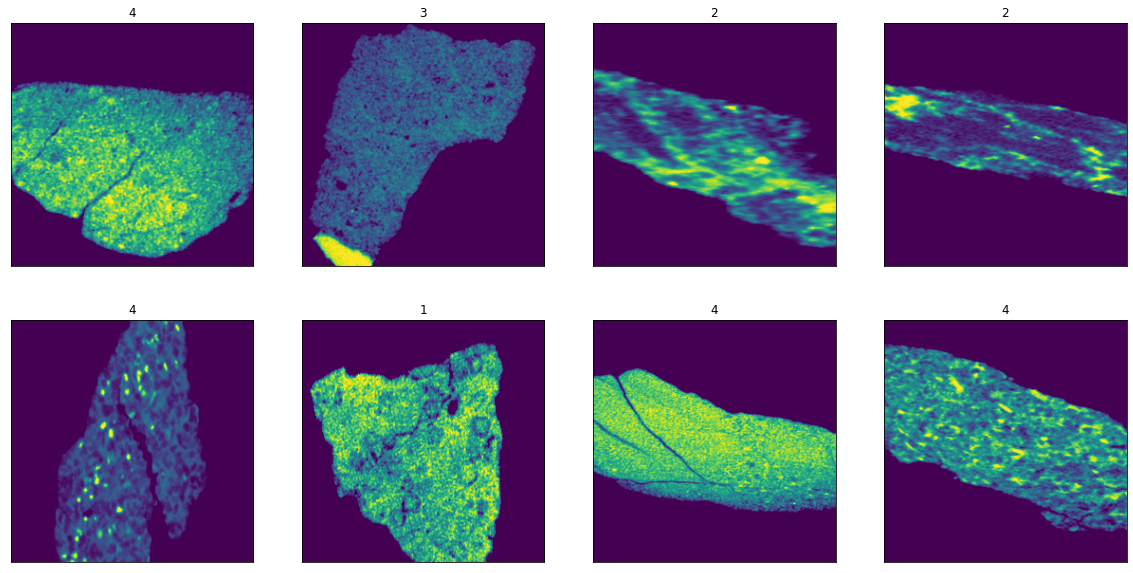

In [19]:
batch_size = 8
train_dataloader = torch.utils.data.DataLoader(trainDataset, batch_size=batch_size,shuffle=True)

train_features, train_labels = next(iter(train_dataloader))

fig, axs = plt.subplots(2,4,figsize=(20,10))

axs = axs.ravel()

for i_, ax in enumerate(axs):
    ax.imshow(train_features.numpy()[i_][0])
    ax.set_title(train_labels.numpy()[i_])
    ax.set_xticks([])
    ax.set_yticks([])